# Audio Processing

In this livecode we will both generate sound waves & analyze `.wav` files on the hard drive.

The goal is to understand how a sound is encoded in numbers, the same way images or videos are, as well as basically anything a computer manipulates.

In [ ]:
!pip install scipy --quiet

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile
from IPython.display import Audio

## Sound Synthesis

Before we generate sound from scratch, let's see how the computer records sound from a microphone:

<img src="https://wagon-public-datasets.s3.amazonaws.com/03-Maths/01-Algebra-Calculus/mic_recording_original.png" width=1000>

In [ ]:
R = 44100 # Sampling rate
D = 3     # Duration of the sound

<img src="sampling-rate.jpg" width=1000>

<img src="frequency-amplitude.jpg" width=1000>

❓ Write a `note(f)` function which takes a frequency $f$ (in Hz) and generate a sinusoide signal with sampling rate `R` and duration `D` (constants).

<details>
    <summary>💡 <strong>Hint</strong> </summary>
    
A single-frequency sound wave with frequency $f$ and maximum amplitude $A$ is represented by the sine function:

$$y(t)=A \times sin(2 \pi f t)$$

where $t$ is time and $y(t)$ is the amplitude of the sound wave at time $t$.

You can consider for now that the maximum amplitude $A$ is `1`.

Remember, you can generate a big list of numbers using [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
</details>

In [8]:
R = 44100 # Sampling rate
D = 3   #

def note(f):
    A = 1
    t = np.linspace(0, D, R * D)
    return A * np.sin(2 * np.pi * f * t)

3.141592653589793

❓ Plot the output of `note(f)` for `440 Hz`. For `1Hz`. What do you see?

In [9]:
note(440)

array([ 0.00000000e+00,  6.26487971e-02,  1.25051464e-01, ...,
       -1.25051464e-01, -6.26487971e-02,  6.43031366e-13])

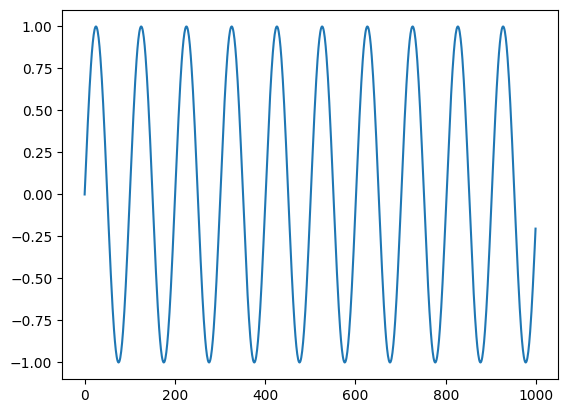

In [12]:
plt.plot(note(440)[:1_000])

❓ Call the `note` function to generate an `A` (440 Hz) from the diapason. Play it.

<details>
    <summary>💡 <strong>Hint</strong></summary>

Use [`Audio`](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html) from `IPython.display` already imported in the notebook at the first cell)
</details>

In [13]:
Audio(data=note(440), rate=R)

❓ Try and layer several notes, like `A` + the perfect fifth, major (or minor) third, etc into a `chord` variable. Play it!

<details>
    <summary>💡 <strong>Hint</strong></summary>
    
Check out the [Frequency Ratio](https://en.wikipedia.org/wiki/Interval_(music)#Frequency_ratios) on Wikipedia. For instance, the perfect fifth has a $\frac{3}{2}$ ratio
</details>

In [21]:
chord = note(440) + note(440 * 3/2) + note(440 * 6/5)
Audio([note(60), note(90)], rate=R)

❓ Plot the first `1000` samples of the chord

In [22]:
chord

array([ 0.00000000e+00,  2.31701937e-01,  4.61902944e-01, ...,
       -4.61902944e-01, -2.31701937e-01, -7.13065933e-13])

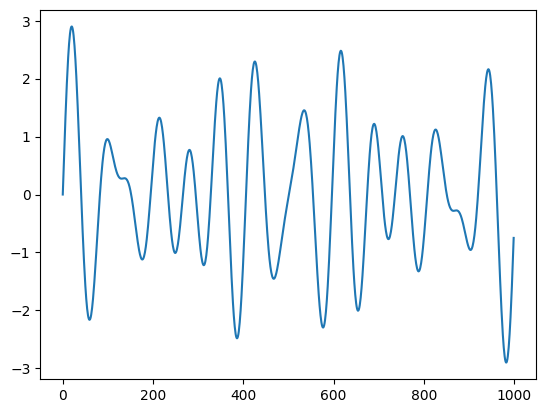

In [23]:
plt.plot(chord[0:1000])

## [Fast Fourier transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform)

> Fourier analysis converts a signal from its original domain (often time or space) to a representation in the frequency domain and vice versa. 
> **Wikipedia**

<img src="https://wagon-public-datasets.s3.amazonaws.com/03-Maths/01-Algebra-Calculus/fourier_transformation.png" width=550>

Let's use [`scipy.fft`](https://docs.scipy.org/doc/scipy/tutorial/fft.html) to analyze the signals we built above.

Run the following code. Change the `chord` above, and replot it. What do you see?

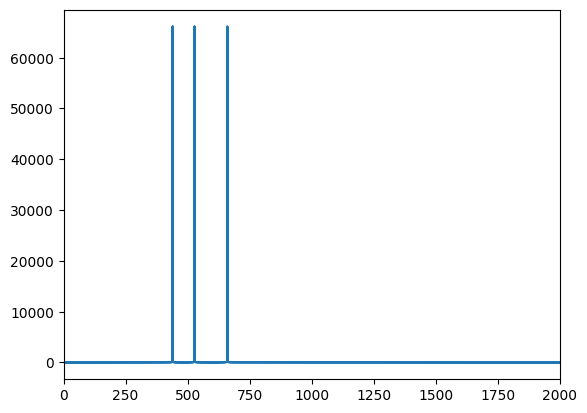

In [24]:
# YOUR CODE HERE
import scipy.fft

def plot_fft(signal, rate, freq_max):
    Y = np.abs(scipy.fft.fft(signal))
    X = np.abs(scipy.fft.fftfreq(Y.size) * rate)
    plt.xlim(0, freq_max)
    plt.plot(X, Y)
    
plot_fft(chord, R, 2000)

## Real-life samples

Let's perform `fft` on the `.wav` files in the folder:

In [25]:
!ls -lh *.wav

-rw-r--r--  1 yusuke  staff   505K Jul 10  2023 bird.wav
-rw-r--r--  1 yusuke  staff   379K Jul 10  2023 blissful_bell.wav
-rw-r--r--  1 yusuke  staff   400K Jul 10  2023 guitar_G.wav
-rw-r--r--  1 yusuke  staff   265K Jul 10  2023 piano_F.wav
-rw-r--r--  1 yusuke  staff   100K Jul 10  2023 snare_80s.wav


Let's load the audio of `bird.wav` and visualize the sound **waveform**

In [26]:
rate, audio = wavfile.read("bird.wav")
audio.T[0][R:(R+10)]

array([-396, -616, -699, -663, -531, -339, -138,   25,  126,  166],
      dtype=int16)

In [31]:
audio.T[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [33]:
audio[:,0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

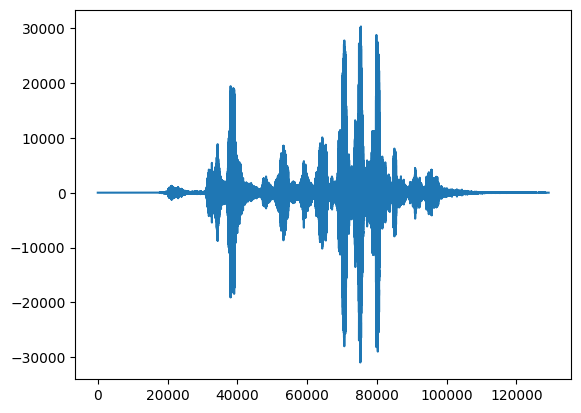

In [27]:
rate, audio = wavfile.read("bird.wav")
plt.plot(audio.T[0])

Now let's apply and plot the FFT of that signal & play it

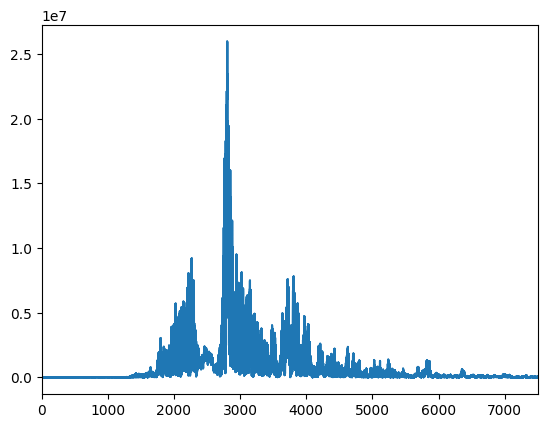

In [28]:
plot_fft(audio.T[0], rate, 7500)
Audio(audio.T[0], rate=rate)

---

Awesome! 

❓ Now it's your turn: try to reproduce that analysis with the other sounds (cf `!ls -lh *.wav` cell above)

In [34]:
ls

README.md                bird.wav                 piano_F.wav
Recap-cpy.ipynb          blissful_bell.wav        sampling-rate.jpg
Recap.ipynb              frequency-amplitude.jpg  snare_80s.wav
amp-freq.jpg             guitar_G.wav


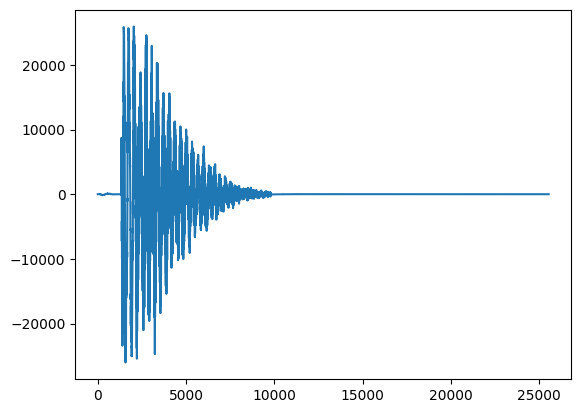

In [35]:
rate, audio = wavfile.read("snare_80s.wav")
plt.plot(audio.T[0])

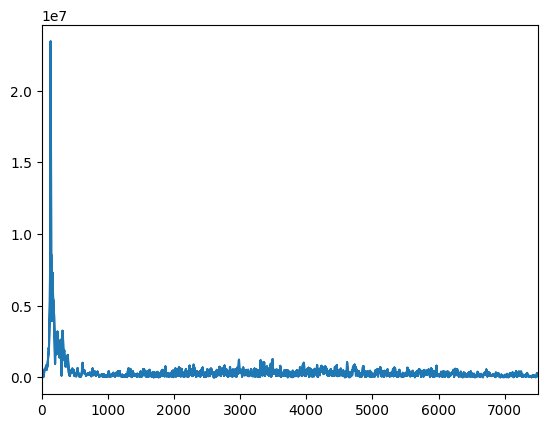

In [36]:
plot_fft(audio.T[0], rate, 7500)
Audio(audio.T[0], rate=rate)

In [37]:
ls

README.md                bird.wav                 piano_F.wav
Recap-cpy.ipynb          blissful_bell.wav        sampling-rate.jpg
Recap.ipynb              frequency-amplitude.jpg  snare_80s.wav
amp-freq.jpg             guitar_G.wav


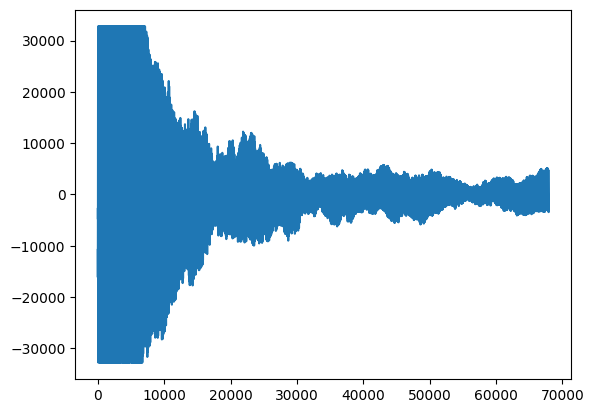

In [38]:
rate, audio = wavfile.read("piano_F.wav")
plt.plot(audio.T[0])

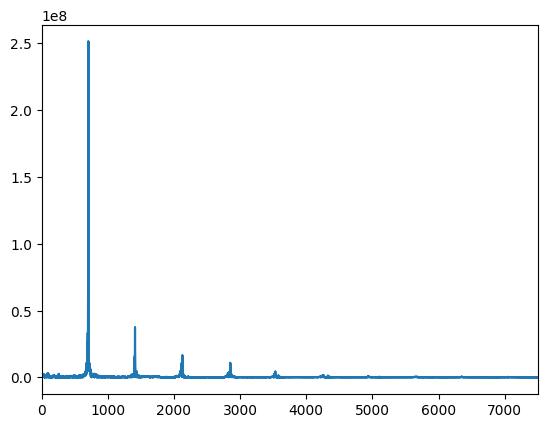

In [39]:
plot_fft(audio.T[0], rate, 7500)
Audio(audio.T[0], rate=rate)